In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)

# Create some syntetic data
size = 8192

Year = np.random.randint(1998, high=2021, size=size, dtype=int)
LotArea = np.random.randint(50, high=2001, size=size, dtype=int)
nFlor = np.random.randint(1, high=11, size=size, dtype=int)
BedAbv = np.random.normal(loc=50.0, scale=5.0, size=size)
county = np.random.randint(1, high=51, size=size, dtype=int)

# Define a function to obtain prices for later testing the model
def fun_price(y,lot,flor,bed,county):    
    return np.sin(y/2020)*lot*flor + bed - county/2

def col_price(row):
    y = row.Year
    flor = row.nFlor
    lot = row.LotArea
    bed = row.BedAbv
    county = row.county
    return int(fun_price(y,lot,flor,bed,county))

home_data = pd.DataFrame({'Year':Year, 'LotArea':LotArea, 'nFlor':nFlor, 'BedAbv':BedAbv, 'county':county})
home_data['Price'] = home_data.apply(col_price,axis=1)
home_data

,Year,LotArea,nFlor,BedAbv,county,Price
0,2003,710,9,49.963179,44,5375
1,2009,1780,8,45.926620,6,11983
2,2010,1631,10,52.698352,25,13720
3,2006,1318,7,45.287878,26,7760
4,2007,371,6,43.726081,33,1892
...,...,...,...,...,...,...
8187,2005,405,1,51.489463,27,377
8188,1999,1382,4,49.900451,21,4659
8189,2002,412,6,57.830214,48,2101
8190,2018,1176,9,53.305526,13,8947


In [2]:
# split data into training and validation data, for both features and target
from sklearn.model_selection import train_test_split

y = home_data.Price
feature_columns = ['Year', 'LotArea', 'nFlor', 'BedAbv', 'county']
X = home_data[feature_columns]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
input_shape = [train_X.shape[1]]

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Create Network
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'), 
    layers.Dense(1)])

model.compile(loss='mae',
              optimizer= keras.optimizers.Adam(0.001))

'''
model.compile(optimizer='sgd',
              loss='mae',
              metrics=['mae'])
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True)
'''
history = model.fit(
    train_X, train_y,
    batch_size=1024,
    epochs=100,
#    callbacks=[early_stopping]
)

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 4844.1470
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 4837.8540
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 4831.1987
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 4823.4385
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 4814.1865
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 4802.8970
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 4788.9507
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 4771.4546
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 4749.1914
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 4720.8901
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 4684.8379
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 4640.2378
Epoch 13/100
6/6 [=======

In [26]:
# Test model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

predictions = model.predict(val_X).tolist()
values = val_y.tolist()
err = mean_absolute_error(predictions,values)
errp =  mean_absolute_percentage_error(predictions,values)

print('Predictions:', predictions[:10])
print('Targets    :', values[:10])
print()
print(f'Absolute Mean Error:', err)
print()
print(f'Absolute Mean Error %:', errp)

Predictions: [[7143.95654296875], [6566.205078125], [2595.567138671875], [1114.9742431640625], [3938.504150390625], [3810.07177734375], [4215.42724609375], [2390.513916015625], [1327.43212890625], [1724.2110595703125]]
Targets    : [6981, 6254, 2185, 669, 3608, 3369, 3885, 1931, 800, 1261]

Absolute Mean Error: 378.34732684493065

Absolute Mean Error %: 0.16109804976810926


<AxesSubplot:>

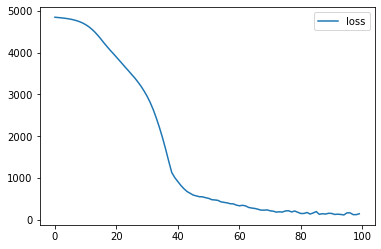

In [25]:
df_hist = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
'''
#For binary

model = keras.Sequential([  
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
'''